#**Module 2: Data Preprocessing**

##**Importing Libraries**

In [25]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pandas_profiling import ProfileReport
from plotly.offline import iplot
!pip install joypy
import joypy
import os
import glob
from sklearn.cluster import KMeans

plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##**Importing Dataset**

Download Dataset pada: https://bit.ly/DatasetExerciseDSSC4

Run code di bawah untuk upload file, lalu choose file penguins_lter.csv dan penguins_size.csv

In [26]:
from google.colab import files
uploaded = files.upload()

Saving penguins_lter.csv to penguins_lter (1).csv
Saving penguins_size.csv to penguins_size (1).csv


In [27]:
import io
data = pd.read_csv(io.BytesIO(uploaded['penguins_size.csv'])) 
study_data = pd.read_csv(io.BytesIO(uploaded['penguins_lter.csv'])) 

In [28]:
data #Melihat isi data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [30]:
study_data

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


<AxesSubplot:>

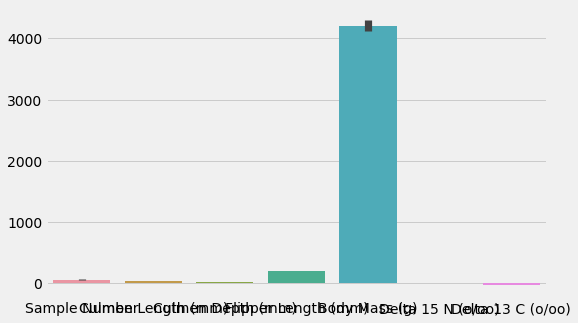

In [31]:
sns.barplot(data=study_data)

Memanggil tabel data

In [ ]:
data

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [ ]:
print(data.head()) #Melihat gambaran awal data

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torgersen              36.7             19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


##**Describing Dataset**

Tampilkan statistik deskriptif dari data!

In [35]:
data.describe(include='all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


In [ ]:
data.describe() #Melihat statistik deskriptif

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [36]:
#Melihat statistik deskriptif dari kolom categori
kategori = data.describe(include='object')
print(kategori)

       species  island   sex
count      344     344   334
unique       3       3     3
top     Adelie  Biscoe  MALE
freq       152     168   168


**Insight**

Berapa rata - rata body mass penguin? 4201.754386

##**Handling Missing Values**

Cek jumlah missing value!

In [ ]:
#input your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [37]:
cekMissingValue = data.isnull().sum()
print(cekMissingValue)

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64


Drop missing value pada culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g!

In [38]:
data.dropna(subset=['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g'], inplace=True)

Mengisi missing value pada sex dengan modus!

In [39]:
#input your code here
addMiss = data['sex'].mode()[0]
data['sex'].fillna(addMiss, inplace=True)
print(addMiss)

MALE


Pada baris ke 336 kolom sex, terdapat data berisi titik (.), drop baris data tersebut! 

In [40]:
#input your code here
data.drop(data[data['sex']== '.'].index, inplace=True)

Cek kembali apakah masih ada missing value!

In [41]:
#input your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            341 non-null    object 
 1   island             341 non-null    object 
 2   culmen_length_mm   341 non-null    float64
 3   culmen_depth_mm    341 non-null    float64
 4   flipper_length_mm  341 non-null    float64
 5   body_mass_g        341 non-null    float64
 6   sex                341 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.3+ KB


In [42]:
#Memeriksa kembali missing value
missing_values_count = data.isnull().sum()
print(missing_values_count)

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


***
**Insight**
***
Apakah masih terdapat missing value? Missing value sudah tidak ada lagi

##**Exploratory Data Analysis**

Tampilkan grafik yang menunjukkan jumlah tiap spesies pinguin!

Adelie       151
Gentoo       122
Chinstrap     68
Name: species, dtype: int64


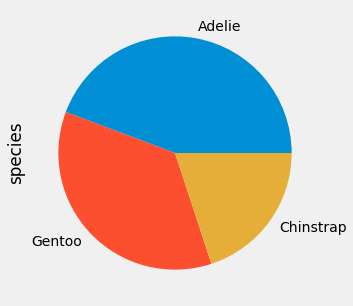

In [45]:
#input your code here 
species_counts = data['species'].value_counts()
species_counts.plot(kind='pie')
print(species_counts)

***
**Insight**
***
Spesies apa dengan jumlah pinguin paling banyak? Species Adelie dengan jumlah 151

Tampilkan scatterplot yang menunjukkan korelasi antara culmen_length dan flipper_length!

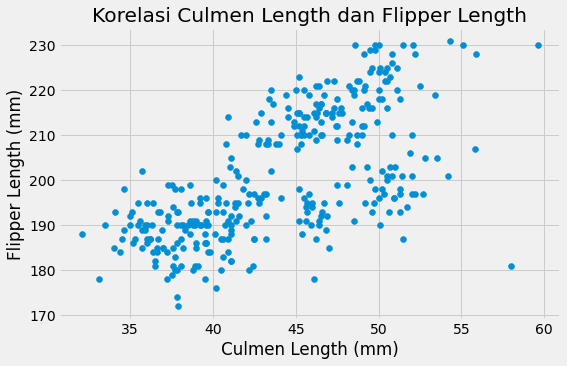

In [46]:
#input your code here
plt.scatter(data['culmen_length_mm'], data['flipper_length_mm'])
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.title('Korelasi Culmen Length dan Flipper Length')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara culmen_length dan flipper_length? Memiliki korelasi yang kuat, dikarenakan float yang dimiliki sangat rapat dan tidak berjarak

In [47]:
#berikut penjelasan dari korelasinya
korelasi = data['culmen_length_mm'], data['flipper_length_mm']
print('Korelasi  antara culmen_length dan flipper_length adalah', korelasi)

Korelasi  antara culmen_length dan flipper_length adalah (0      39.1
1      39.5
2      40.3
4      36.7
5      39.3
       ... 
338    47.2
340    46.8
341    50.4
342    45.2
343    49.9
Name: culmen_length_mm, Length: 341, dtype: float64, 0      181.0
1      186.0
2      195.0
4      193.0
5      190.0
       ...  
338    214.0
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 341, dtype: float64)


Tampilkan scatterplot yang menunjukkan korelasi antara flipper_length dan body_mass!

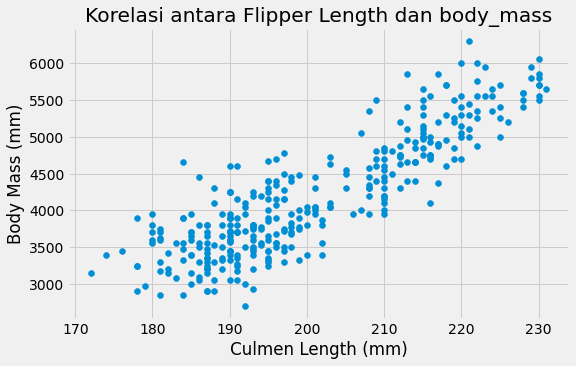

In [ ]:
#input your code here
plt.scatter(data['flipper_length_mm'], data['body_mass_g'])
plt.xlabel('Culmen Length (mm)')
plt.ylabel('Body Mass (mm)')
plt.title('Korelasi antara Flipper Length dan body_mass')
plt.show()

***
**Insight**
***
Bagaimana korelasi antara flipper_length dan body_mass? Memiliki korelasi yang kuat, dikarenakan float yang dimiliki sangat rapat dan tidak berjarak

In [48]:
#berikut penjelasan dari korelasinya
korelasi = data['flipper_length_mm'], data['body_mass_g']
print('korelasi antara flipper_length dan body_mass adalah ',korelasi)

korelasi antara flipper_length dan body_mass adalah  (0      181.0
1      186.0
2      195.0
4      193.0
5      190.0
       ...  
338    214.0
340    215.0
341    222.0
342    212.0
343    213.0
Name: flipper_length_mm, Length: 341, dtype: float64, 0      3750.0
1      3800.0
2      3250.0
4      3450.0
5      3650.0
        ...  
338    4925.0
340    4850.0
341    5750.0
342    5200.0
343    5400.0
Name: body_mass_g, Length: 341, dtype: float64)


Tampilkan pairplot dari semua variabel!

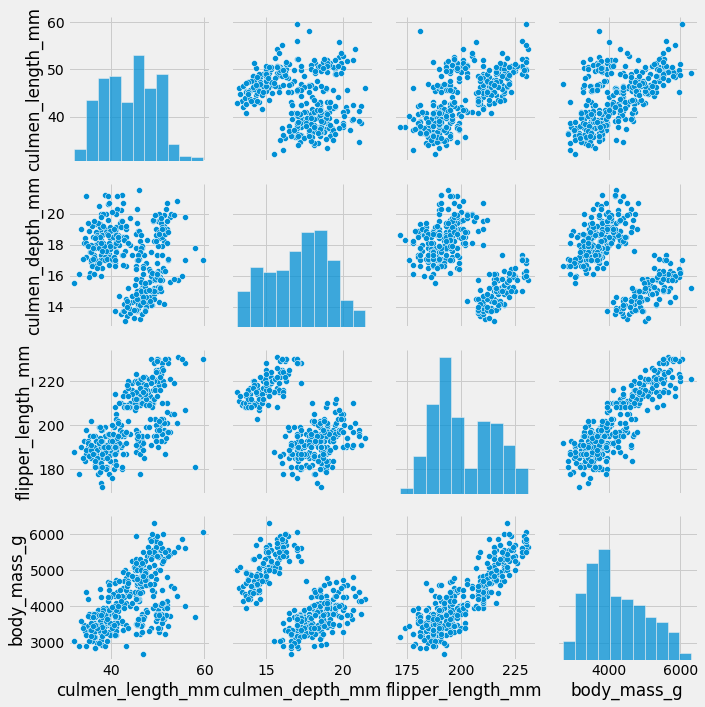

In [49]:
#input your code here
sns.pairplot(data)

***
**Insight**
***
Apa kesimpulan yang dapat kamu ambil dari pairplot di atas? 

Dari pairplot yang ditampilkan, terdapat beberapa kesimpulan yang dapat diambil mengenai hubungan antar variabel pada data pinguin:

Terdapat perbedaan ukuran tubuh yang cukup signifikan antara jenis pinguin Adelie dengan jenis pinguin Gentoo dan Chinstrap.
Terdapat korelasi yang cukup kuat antara culmen_length_mm dan flipper_length_mm, yang menunjukkan semakin panjang culmen (paruh) seekor pinguin, maka cenderung semakin panjang juga flipper pinguin tersebut.
Terdapat beberapa outlier pada beberapa variabel, seperti body_mass_g dan bill_depth_mm pada jenis pinguin Gentoo.
Terdapat beberapa distribusi variabel yang miring, seperti body_mass_g dan culmen_length_mm, yang menunjukkan adanya perbedaan ukuran tubuh yang cukup signifikan pada jenis pinguin tertentu.
Terdapat juga beberapa hubungan antara pasangan variabel yang tidak terlalu signifikan, seperti body_mass_g dan culmen_depth_mm, flipper_length_mm dan body_mass_g, atau culmen_length_mm dan body_mass_g.